In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

In [4]:
np.random.rand(1)

array([0.96386971])

# Basic implementation

In [78]:
def boxFilter(img: np.ndarray, kernel: tuple) -> np.ndarray:
    assert all(map(lambda i, j: i <= j, kernel, img.shape)), 'Kernel {} is bigger than image {}'.format(kernel, img.shape)
    assert len(img.shape) in [2, 3], 'Incompatible image shape {}'.format(img.shape)
    
    def boxApply(box: np.ndarray):
        return np.full(shape=box.shape, fill_value=(box * (1 / (box.shape[0] * box.shape[1]))).sum())
          
    
    x_ind = np.tile(np.arange(0, img.shape[0] - kernel[0]+1), img.shape[1] - kernel[1] +1)
    y_ind = np.repeat(np.arange(0, img.shape[1] - kernel[1]+1), img.shape[0] - kernel[0] +1)
    
    img_blured = np.full(shape=img.shape, fill_value=255)
    
    for x, y in zip(x_ind, y_ind):
        if len(img.shape) == 3:
            for z in range(img.shape[2]):
                img_blured[x: x + kernel[0], y: y + kernel[1], z] = boxApply(img[x: x + kernel[0], y: y + kernel[1], z])
        else:
            img_blured[x: x + kernel[0], y: y + kernel[1]] = boxApply(img[x: x + kernel[0], y: y + kernel[1]])
    
    return img_blured

In [85]:
img = cv2.imread('lab_1/img_1_png.png',  cv2.IMREAD_COLOR)
print(type(img))

<class 'numpy.ndarray'>


In [33]:
img.shape

(300, 241, 3)

## IMG №1

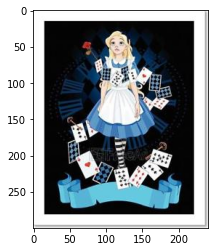

In [86]:
# cv2.imshow('img', img)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # this converts it into RGB

plt.imshow(rgb_img)
plt.show()

In [10]:
rgb_img.shape

(300, 241, 3)

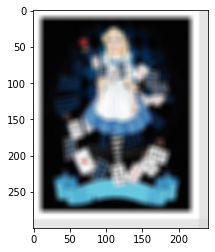

In [89]:
plt.imshow(boxFilter(rgb_img, (10, 10)))
plt.show()

## IMG №2

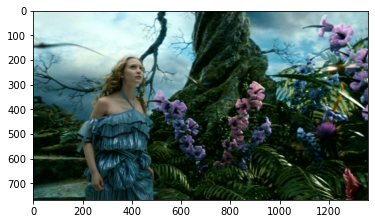

In [93]:
img2 = cv2.imread('lab_1/img_2.jpg',  cv2.IMREAD_COLOR)

rgb_img_2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # this converts it into RGB

plt.imshow(rgb_img_2)
plt.show()

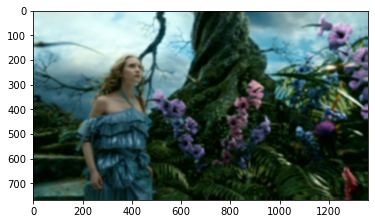

In [94]:
plt.imshow(boxFilter(rgb_img_2, (10, 10)))
plt.show()

# IMG № 3

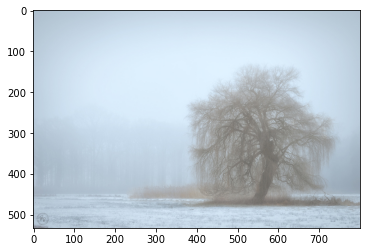

In [95]:
img3 = cv2.imread('lab_1/img_3.jpg',  cv2.IMREAD_COLOR)

rgb_img_3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB) # this converts it into RGB

plt.imshow(rgb_img_3)
plt.show()

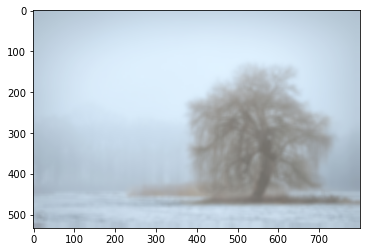

In [96]:
plt.imshow(boxFilter(rgb_img_3, (10, 10)))
plt.show()

# IMG № 4

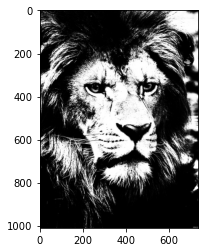

In [98]:
img4 = cv2.imread('lab_1/img_4.jpeg',  cv2.IMREAD_COLOR)

rgb_img_4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB) # this converts it into RGB

plt.imshow(rgb_img_4)
plt.show()

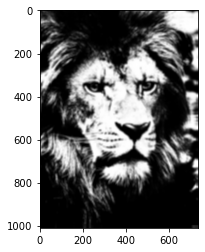

In [99]:
plt.imshow(boxFilter(rgb_img_4, (10, 10)))
plt.show()

In [82]:
a = [[7, 4, 0, 1], 
        [5, 6, 2, 2], 
        [6, 10, 7, 8], 
        [1, 4, 2, 0]]

boxFilter(np.array(a), (2,2))

array([[5, 3, 1, 1],
       [6, 6, 4, 4],
       [5, 5, 4, 4],
       [5, 5, 4, 4]])

In [81]:
def boxApply(box: np.ndarray):
#     print((1 / (box.shape[0] * box.shape[1])))
    kernel = np.ones(box.shape) * (1 / (box.shape[0] * box.shape[1]))
    return (box * kernel).sum()

boxApply(np.array(a)[:2, :2])

5.5

In [90]:
np.array(a)[:2, :2]

In [91]:
a

[[7, 4, 0, 1], [5, 6, 2, 2], [6, 10, 7, 8], [1, 4, 2, 0]]

In [74]:
np.ones((5,5),np.float32)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [ ]:
for i in range(np.array([[1, 2],[2, 3],[3, 4]]).shape[3]):
    print(i)

In [17]:
all(map(lambda i, j: i <= j, (1, 2), (1, 2, 3)))

False

In [22]:
a * (1 / a.sum())

array([[[0.06666667],
        [0.13333333]],

       [[0.13333333],
        [0.2       ]],

       [[0.2       ],
        [0.26666667]]])

In [34]:
a

array([[[1],
        [2]],

       [[2],
        [3]],

       [[3],
        [4]]])

In [25]:
for x, y in zip(range(2), range(4)):
    print('{}, {}'.format(x, y))

0, 0
1, 1


In [28]:
np.arange(3, 9)

array([3, 4, 5, 6, 7, 8])

In [60]:
a

array([[[1],
        [2]],

       [[2],
        [3]],

       [[3],
        [4]]])

In [65]:
boxFilter(a, (2, 2))

array([[[0],
        [0]],

       [[0],
        [0]],

       [[3],
        [4]]])

In [47]:
a.shape

(3, 2, 1)

In [56]:
a

array([[[-9223372036854775808],
        [-9223372036854775808]],

       [[-9223372036854775808],
        [-9223372036854775808]],

       [[                   3],
        [                   4]]])